# Imports

In [1]:
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import numpy as np
from warnings import simplefilter
import seaborn as sns
simplefilter(action="ignore", category=pd.errors.PerformanceWarning)

# Get Data

In [2]:
# Get raw data
companies = pd.read_csv("/kaggle/input/sp-500-stocks/sp500_companies.csv")
index = pd.read_csv("/kaggle/input/sp-500-stocks/sp500_index.csv", parse_dates=['Date'])
stocks = pd.read_csv("/kaggle/input/sp-500-stocks/sp500_stocks.csv", parse_dates=['Date'])
macro = pd.read_csv("/kaggle/input/macroeconomic-factors-affecting-us-housing-prices/DATA.csv", parse_dates=['DATE'])

In [3]:
companies.head(10)

,Exchange,Symbol,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight
0,NMS,MSFT,Microsoft Corporation,Microsoft Corporation,Technology,Software - Infrastructure,420.21,3123130925056,1.251820e+11,0.170,Redmond,WA,United States,221000.0,Microsoft Corporation develops and supports so...,0.063105
1,NMS,AAPL,Apple Inc.,Apple Inc.,Technology,Consumer Electronics,189.87,2911485558784,1.296290e+11,-0.043,Cupertino,CA,United States,150000.0,"Apple Inc. designs, manufactures, and markets ...",0.058828
2,NMS,NVDA,NVIDIA Corporation,NVIDIA Corporation,Technology,Semiconductors,924.79,2274826125312,3.448000e+10,2.653,Santa Clara,CA,United States,29600.0,NVIDIA Corporation provides graphics and compu...,0.045964
3,NMS,GOOG,Alphabet Inc.,Alphabet Inc.,Communication Services,Internet Content & Information,177.29,2182652493824,1.097230e+11,0.154,Mountain View,CA,United States,180895.0,Alphabet Inc. offers various products and plat...,0.044102
4,NMS,GOOGL,Alphabet Inc.,Alphabet Inc.,Communication Services,Internet Content & Information,176.06,2182651052032,1.097230e+11,0.154,Mountain View,CA,United States,180895.0,Alphabet Inc. offers various products and plat...,0.044102
5,NMS,AMZN,"Amazon.com, Inc.","Amazon.com, Inc.",Consumer Cyclical,Internet Retail,184.70,1922098921472,9.660900e+10,0.125,Seattle,WA,United States,1525000.0,"Amazon.com, Inc. engages in the retail sale of...",0.038837
6,NMS,META,"Meta Platforms, Inc.","Meta Platforms, Inc.",Communication Services,Internet Content & Information,471.91,1197013860352,6.844700e+10,0.273,Menlo Park,CA,United States,69329.0,"Meta Platforms, Inc. engages in the developmen...",0.024186
7,NYQ,BRK-B,Berkshire Hathaway Inc. New,Berkshire Hathaway Inc.,Financial Services,Insurance - Diversified,416.94,900815519744,1.070460e+11,0.052,Omaha,NE,United States,396500.0,"Berkshire Hathaway Inc., through its subsidiar...",0.018202
8,NYQ,LLY,Eli Lilly and Company,Eli Lilly and Company,Healthcare,Drug Manufacturers - General,770.00,731811872768,1.337370e+10,0.260,Indianapolis,IN,United States,43000.0,"Eli Lilly and Company discovers, develops, and...",0.014787
9,NMS,AVGO,Broadcom Inc.,Broadcom Inc.,Technology,Semiconductors,1395.29,646606684160,2.040400e+10,0.164,Palo Alto,CA,United States,20000.0,"Broadcom Inc. designs, develops, and supplies ...",0.013065


In [4]:
index.head(10)

,Date,S&P500
0,2014-05-19,1885.08
1,2014-05-20,1872.83
2,2014-05-21,1888.03
3,2014-05-22,1892.49
4,2014-05-23,1900.53
5,2014-05-27,1911.91
6,2014-05-28,1909.78
7,2014-05-29,1920.03
8,2014-05-30,1923.57
9,2014-06-02,1924.97


In [5]:
stocks.head(10)

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
0,2010-01-04,MMM,40.835049,69.414719,69.774246,69.122070,69.473244,3640265.0
1,2010-01-05,MMM,40.579266,68.979935,69.590302,68.311035,69.230766,3405012.0
2,2010-01-06,MMM,41.154758,69.958191,70.735786,69.824417,70.133781,6301126.0
3,2010-01-07,MMM,41.184265,70.008362,70.033447,68.662209,69.665550,5346240.0
4,2010-01-08,MMM,41.474480,70.501671,70.501671,69.648827,69.974915,4073337.0
5,2010-01-11,MMM,41.307220,70.217392,70.735786,69.740807,70.551842,3500812.0
6,2010-01-12,MMM,41.341671,70.275917,70.384613,69.648827,69.882942,3626033.0
7,2010-01-13,MMM,41.208855,70.050163,70.326088,69.565216,70.326088,3709992.0
8,2010-01-14,MMM,41.071152,69.816055,70.175583,69.749161,70.016724,3150384.0
9,2010-01-15,MMM,41.007202,69.707359,70.309364,69.289299,69.832779,4730180.0


In [6]:
macro.head(10)

,DATE,UNRATE(%),CONSUMER CONF INDEX,PPI-CONST MAT.,CPIALLITEMS,INFLATION(%),MORTGAGE INT. MONTHLY AVG(%),MED HOUSEHOLD INCOME,CORP. BOND YIELD(%),MONTHLY HOME SUPPLY,% SHARE OF WORKING POPULATION,GDP PER CAPITA,QUARTERLY REAL GDP,QUARTERLY GDP GROWTH RATE (%),CSUSHPISA
0,2022-01-05,3.6,106.4,352.857,123.322800,8.581511,5.2300,NaN,4.13,8.4,NaN,74737,19699.465,-0.144227,120.724
1,2022-01-04,3.6,107.3,343.730,121.978170,8.258629,4.9825,NaN,3.76,8.4,NaN,74737,19699.465,-0.144227,121.813
2,2022-01-03,3.6,107.2,345.852,121.301004,8.542456,4.1720,NaN,3.43,7.0,NaN,73289,19727.918,-0.395692,122.888
3,2022-01-02,3.8,110.5,343.583,119.702806,7.871064,3.7625,NaN,3.25,6.0,NaN,73289,19727.918,-0.395692,123.831
4,2022-01-01,4.0,113.8,345.742,118.619339,7.479872,3.4450,NaN,2.93,5.7,NaN,73289,19727.918,-0.395692,124.780
5,2021-01-12,3.9,115.8,335.032,117.629537,7.036403,3.0980,NaN,2.65,5.6,64.924129,72171,19806.290,1.680778,125.734
6,2021-01-11,4.2,109.5,328.940,117.269225,6.809003,3.0675,NaN,2.62,6.2,64.924129,72171,19806.290,1.680778,126.669
7,2021-01-10,4.6,113.8,322.120,116.695849,6.221869,3.0675,NaN,2.68,6.9,64.924129,72171,19806.290,1.680778,127.622
8,2021-01-09,4.7,109.3,317.136,115.734314,5.390349,2.9000,NaN,2.53,6.1,64.924129,69824,19478.893,0.570948,128.461
9,2021-01-08,5.2,113.8,313.083,115.420835,5.251272,2.8425,NaN,2.55,6.5,64.924129,69824,19478.893,0.570948,129.355


In [7]:
########################################################
# Join into one wide table which will be our raw dataset
########################################################
# Join index table onto stocks table
df = stocks.merge(
    right=index,
    how='left',
    left_on='Date',
    right_on='Date'
)

# Join companies table onto stocks and index table, dropping some unecessary columns from companies table
df = df.merge(
    right=companies[['Symbol', 'Sector',]],
    how='left',
    left_on='Symbol',
    right_on='Symbol'
)

# Since macro is month start data, get YYYYMM to use as a column to join on
macro['YYYYMM'] = macro['DATE'].dt.strftime('%Y%d%m').str[:6]
df['YYYYMM'] = df['Date'].dt.strftime('%Y%m%d').str[:6]

# Join macro table onto dataframe
df = df.merge(
    right=macro,
    how='left',
    left_on='YYYYMM',
    right_on='YYYYMM'
)

###################################################################
# Trim data for start and end dates and drop columns used for joins
###################################################################

# Drop dates older than 10 years ago (S&P only provides data with 10 year rolling history)
ten_years_ago = datetime.now() - timedelta(days=365.25*10)
df = df[df['Date'] >= ten_years_ago].reset_index(drop=True)

# Drop dates after 1st May 2022 (this is when the macro data ends)
df = df[df['Date'] <= pd.to_datetime("2022-05-01")]

# Drop columns used to join and other unecessary columns and rename columns
to_drop = ['DATE', 'YYYYMM', 'MONTHLY HOME SUPPLY', '% SHARE OF WORKING POPULATION', 'PPI-CONST MAT.', 'MED HOUSEHOLD INCOME']
df.drop(to_drop, axis=1, inplace=True)
df.rename(
    mapper={
        'INFLATION(%)': 'Inflation (%)',
        'MORTGAGE INT. MONTHLY AVG(%)': 'Monthly Average Mortgage Rate (%)',
        'CORP. BOND YIELD(%)': 'Corporate Bond Yield',
        'GDP PER CAPITA': 'GDP Per Capita',
        'QUARTERLY REAL GDP': 'Quarterly Real GDP',
        'QUARTERLY GDP GROWTH RATE (%)': 'Quarterly GDP Growth Rate (%)',
        'CSUSHPISA': 'Home Price Index',
        'CPIALLITEMS': 'CPI All Items',
        'CONSUMER CONF INDEX': 'Consumer Confidence Index',
        'UNRATE(%)': 'Unemployment Rate (%)'
    },
    axis=1,
    inplace=True
)

# Order by date for ease
df.sort_values(
    by='Date',
    inplace=True,
    ignore_index=True
)

# Reset index
df = df.reset_index(drop=True)

In [8]:
df.columns

Index(['Date', 'Symbol', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume',
       'S&P500', 'Sector', 'Unemployment Rate (%)',
       'Consumer Confidence Index', 'CPI All Items', 'Inflation (%)',
       'Monthly Average Mortgage Rate (%)', 'Corporate Bond Yield',
       'GDP Per Capita', 'Quarterly Real GDP', 'Quarterly GDP Growth Rate (%)',
       'Home Price Index'],
      dtype='object')

# EDA

### Nulls

In [9]:
# Column types and non-null counts
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007006 entries, 0 to 1007005
Data columns (total 20 columns):
 #   Column                             Non-Null Count    Dtype         
---  ------                             --------------    -----         
 0   Date                               1007006 non-null  datetime64[ns]
 1   Symbol                             1007006 non-null  object        
 2   Adj Close                          975487 non-null   float64       
 3   Close                              975487 non-null   float64       
 4   High                               975487 non-null   float64       
 5   Low                                975487 non-null   float64       
 6   Open                               975487 non-null   float64       
 7   Volume                             975487 non-null   float64       
 8   S&P500                             1007006 non-null  float64       
 9   Sector                             1007006 non-null  object        
 10  Unempl

### Survivorship Bias?

In [10]:
# Check if there is any difference in constituents over time
unique_constituents = stocks.groupby('Date')['Symbol'].unique().reset_index()['Symbol']
first_constituents = unique_constituents[0]
difference = False
for u in unique_constituents:
    if len(u) != len(first_constituents):
        print("Length mismatch")
        difference = True
        break
    elif not all(f == x for f, x in zip(first_constituents, u)):
        print("Constituent mismatch")
        difference = True
        break
print(f"Constituents change over time? {difference}")

Constituents change over time? False


### Clean Data
The first thing to note is that the dataset is all current S&P 500 constituents historically, rather than consituents at the time, so there is some inherent survivorship bias. Also, it turns out that we get data for a ticker when the stock goes public - which is before it enters the index. Before the ticker goes public, we have no pricing data. We can't backfill as this would cause look-ahead bias and doesn't make sense anyway since those stocks wouldn't have had prices. It turns out that if we simply drop all the stocks that don't have pricing data at the start (because they're not listed), this actually removes all the nans in the pricing/volume dataset. This still leaves us with more than 400 names so it's not too bad. If there were any nans we would use forward filling at a stock level to avoid look-ahead bias of linear interpolation.

In [11]:
# Get df of first date 
first_date = df['Date'].min()
mask = df['Date'] == first_date
first_date_df = df[mask]

# Get tickers with no data in numeircal columns at first date
numerical_cols = ['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume', 'S&P500']
symbols_with_nans = first_date_df[first_date_df[numerical_cols].isnull().any(axis=1)]['Symbol']

# Drop tickers that don't have data at the start
df = df[~df['Symbol'].isin(symbols_with_nans)]

# Print number of names left. Confirm there are no nulls left
print(f"There are {len(df['Symbol'].unique())} tickers remaining")
print(df.isnull().value_counts())

# Reset index
df = df.reset_index(drop=True)

There are 468 tickers remaining
Date   Symbol  Adj Close  Close  High   Low    Open   Volume  S&P500  Sector  Unemployment Rate (%)  Consumer Confidence Index  CPI All Items  Inflation (%)  Monthly Average Mortgage Rate (%)  Corporate Bond Yield  GDP Per Capita  Quarterly Real GDP  Quarterly GDP Growth Rate (%)  Home Price Index
False  False   False      False  False  False  False  False   False   False   False                  False                      False          False          False                              False                 False           False               False                          False               936936
Name: count, dtype: int64


### Plots

<Axes: title={'center': 'Value of S&P 500'}, xlabel='Date'>

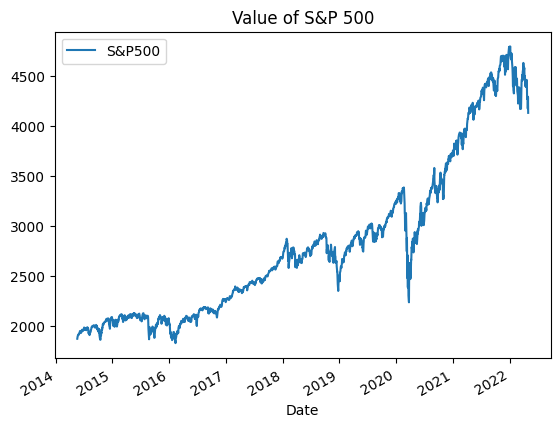

In [12]:
# Plot S&P 500 index value over time
df.plot(x='Date', y='S&P500', title='Value of S&P 500')

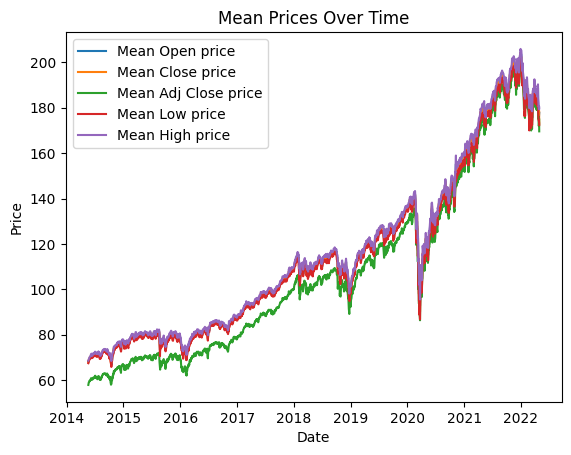

In [13]:
# Plot mean prices over time
mean_open = df.pivot(index='Date', columns='Symbol', values=['Open']).mean(axis=1)
mean_close = df.pivot(index='Date', columns='Symbol', values=['Close']).mean(axis=1)
mean_adj_close = df.pivot(index='Date', columns='Symbol', values=['Adj Close']).mean(axis=1)
mean_low = df.pivot(index='Date', columns='Symbol', values=['Low']).mean(axis=1)
mean_high = df.pivot(index='Date', columns='Symbol', values=['High']).mean(axis=1)
plt.plot(mean_open, label='Mean Open price')
plt.plot(mean_close, label='Mean Close price')
plt.plot(mean_adj_close, label='Mean Adj Close price')
plt.plot(mean_low, label='Mean Low price')
plt.plot(mean_high, label='Mean High price')
plt.title('Mean Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

<Axes: title={'center': 'Mean Trading Volume of S&P 500 Constituents Over Time'}, xlabel='Date'>

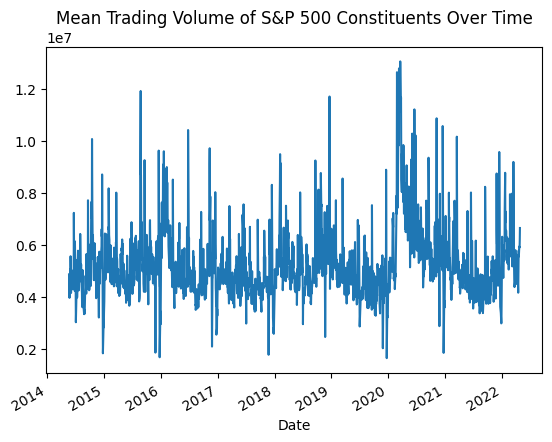

In [14]:
# Plot median trading volume over time
df.pivot(index='Date', columns='Symbol', values='Volume').mean(axis=1).plot(title='Mean Trading Volume of S&P 500 Constituents Over Time')

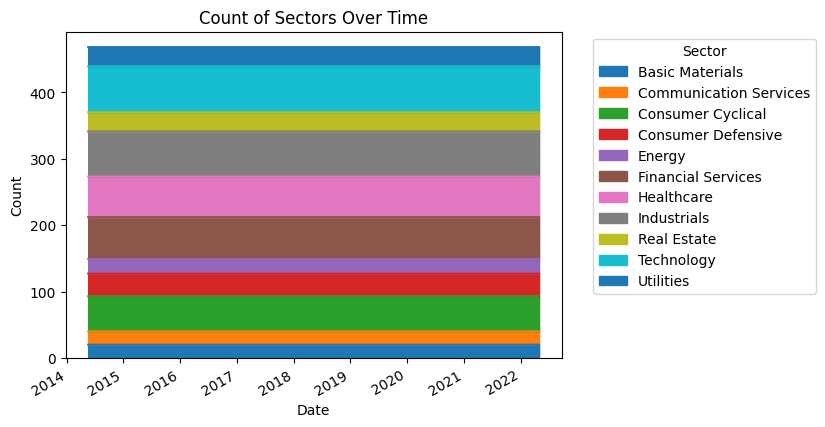

In [15]:
# Plot current sector distribution
sector_counts = df.groupby('Date')['Sector'].value_counts().unstack(fill_value=0)
sector_counts.plot(kind='area')
plt.title('Count of Sectors Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend(title='Sector', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

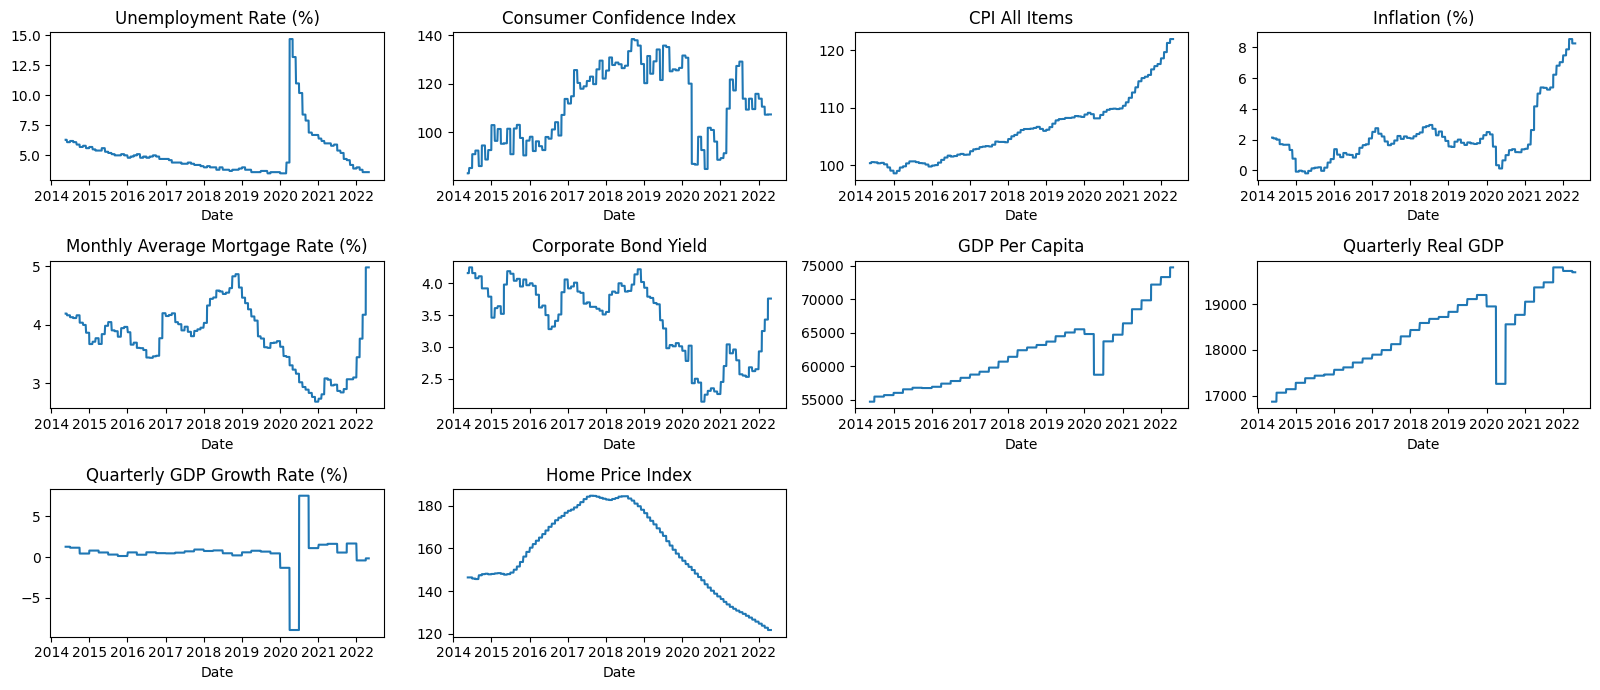

In [16]:
###########################
# Plot macro indicators
###########################

# Cols to plot
macro_cols = ['Unemployment Rate (%)',
       'Consumer Confidence Index', 'CPI All Items', 'Inflation (%)',
       'Monthly Average Mortgage Rate (%)',
       'Corporate Bond Yield', 'GDP Per Capita', 'Quarterly Real GDP',
       'Quarterly GDP Growth Rate (%)', 'Home Price Index']

# Calculate the number of rows and columns for the grid layout
num_plots = len(macro_cols)
num_rows = (num_plots - 1) // 4 + 1  # Number of rows (4 plots per row)
num_cols = min(num_plots, 4)  # Number of columns (maximum 4 plots per row)

# Create the subplots with the desired grid layout
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 7))

# Iterate over each column and plot in the corresponding subplot
for i, column in enumerate(macro_cols):
    row = i // num_cols 
    col = i % num_cols

    # Select the appropriate subplot
    if num_rows > 1:
        ax = axes[row, col]
    else:
        ax = axes[col]
    
    # Plot
    ax.plot(df['Date'], df[column])
    ax.set_title(column)
    ax.set_xlabel('Date') 

# Remove any empty subplots
if num_plots < num_rows * num_cols:
    if num_rows > 1:
        for i in range(num_plots, num_rows * num_cols):
            fig.delaxes(axes[i // num_cols, i % num_cols])
    else:
        for i in range(num_plots, num_rows * num_cols):
            fig.delaxes(axes[i])

# Adjust spacing
plt.subplots_adjust(hspace=0.5)  # Adjust the vertical spacing between subplots
plt.tight_layout()  # Adjust the spacing between subplots

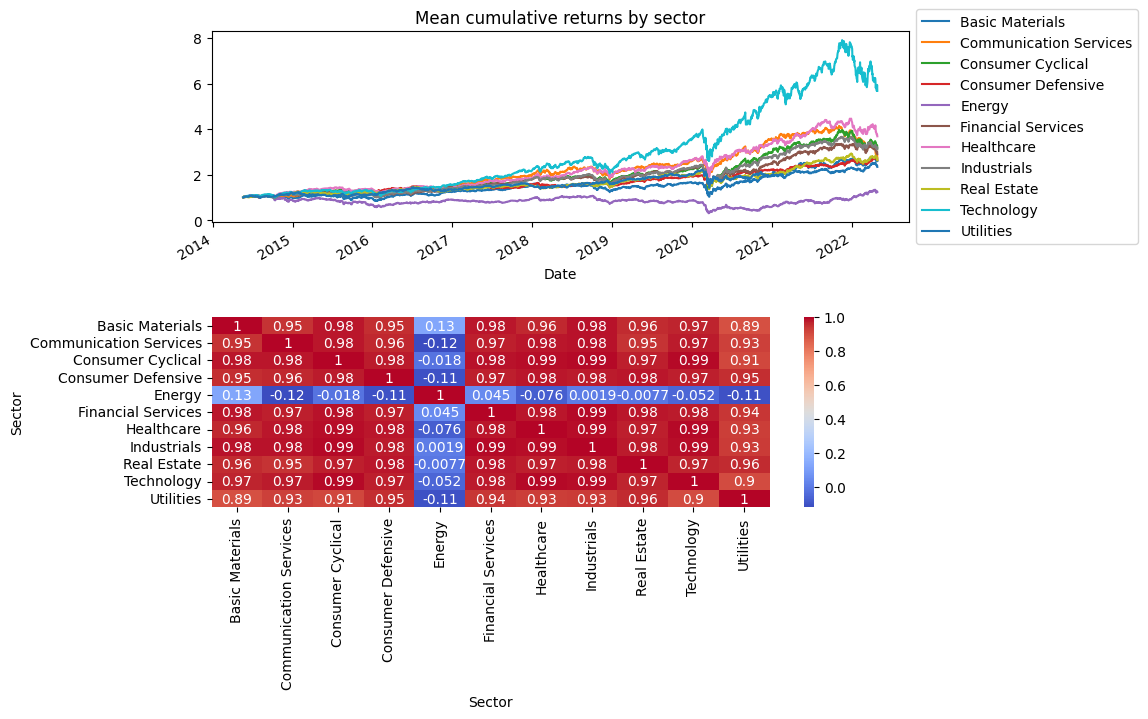

In [17]:
#############################################################################
# Returns in each sector and their correlations
#############################################################################

# Calulate cumulative returns using 1-day forward returns
sector_returns_df = df[['Date', 'Symbol', 'Sector', 'Adj Close']].copy()
sector_returns_df['1-Day Forward Adj Close'] = sector_returns_df.groupby('Symbol')['Adj Close'].shift(-1)
sector_returns_df['1-Day Forward Return'] = (sector_returns_df['1-Day Forward Adj Close'] - sector_returns_df['Adj Close']) / sector_returns_df['Adj Close']
sector_returns_df.drop('1-Day Forward Adj Close', axis=1, inplace=True)
sector_returns_df['Cumulative Return'] = sector_returns_df.groupby('Symbol')['1-Day Forward Return'].transform(lambda x: (1 + x).cumprod())

# Calculate mean cumulative return by sector at each date
sector_returns_df = sector_returns_df.pivot_table(index='Date', columns='Sector', values='Cumulative Return', aggfunc='mean')

# Calculate and plot sector returns and correlation matrix
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(9, 7))
sector_returns_df.plot(ax=ax1, title='Mean cumulative returns by sector')
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
sector_correlations = sector_returns_df.corr()
sns.heatmap(sector_correlations, annot=True, cmap='coolwarm', ax=ax2)
plt.subplots_adjust(hspace=0.5)
plt.show()

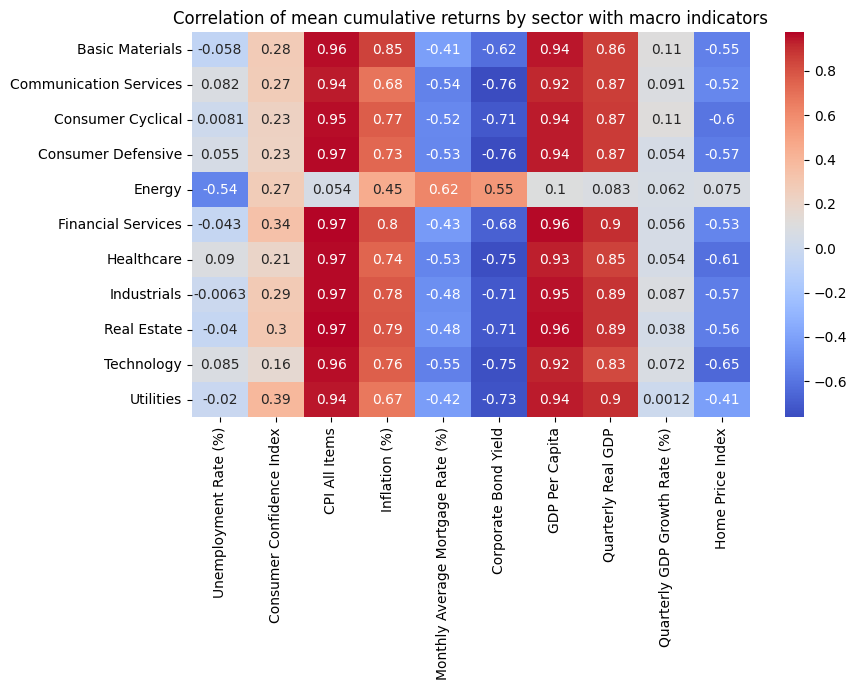

In [18]:
###############################################################
# Correlation of sector level returns with each macro indicator
###############################################################
# Combine macro data with sector returns data
sector_returns_with_macro = pd.merge(
    left=sector_returns_df,
    right=df[['Date'] + macro_cols],
    how='left',
    on='Date'
)

# Calculate correlation matrix of sector-level returns with macro indicator
macro_sector_correlation = sector_returns_with_macro.drop('Date', axis=1).corr()
unique_sectors = list(df['Sector'].dropna().unique())
macro_sector_correlation.drop(unique_sectors, axis=1, inplace=True)
macro_sector_correlation.drop(macro_cols, axis=0, inplace=True)

# Plot correlation matrix
fig, ax = plt.subplots(figsize=(9,5)) 
sns.heatmap(macro_sector_correlation, annot=True, cmap='coolwarm', ax=ax)
ax.set_title("Correlation of mean cumulative returns by sector with macro indicators")
plt.show()

### Stationarity Analysis

# Write Outputs

In [19]:
# Write to file
df.to_csv(path_or_buf="data.csv")